### <b><div style='padding:8px;background-color:#003f88;color:white;border-radius:2px;font-size:100%;text-align: left'>Heart Disease Prediction</div></b>
### Project Overview

The aim of this project is to build a machine-learning model that can predict the likelihood of a person having a heart disease based on some features.


#### Import Required Libraries

In [3]:
# For data analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load the dataset

df = pd.read_csv("heart.csv")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Data Dictionary

The heart dataset contains 303 records and 14 columns, including the target variable. The features include:

- `Age`: Age of the individual
- `Sex`: Gender of the individual
- `ChestPainType`: Type of chest pain experienced
- `RestingBP`: Resting blood pressure
- `Cholesterol`: Serum cholesterol in mg/dl
- `FastingBS`: Fasting blood sugar
- `RestingECG`: Resting electrocardiographic results
- `MaxHR`: Maximum heart rate achieved
- `ExerciseAngina`: Exercise-induced angina
- `Oldpeak`: ST depression induced by exercise
- `ST_Slope`: Slope of the peak exercise ST segment
- `ca`: number of major vessels colored by flourosopy (ca)
- `thal`: thalassemia (thal)
- `Target`: Presence of heart disease (1 = Yes, 0 = No)

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

##### For better understanding and flow of analysis, we will rename some of the columns

In [9]:
# Renaming columns

df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
              'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Data Investigation & Cleaning

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [12]:
# Check the data type

df.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object

In [13]:
# Check for missing values

df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [14]:
# Check for duplicates

df.duplicated().any().sum()

1

In [15]:
# Drop duplicate

df.drop_duplicates(inplace=True)

df.duplicated().any().sum()

0

In [16]:
# Check the number unique values in each features

df.nunique()


age                         41
sex                          2
chest_pain_type              4
resting_blood_pressure      49
cholesterol                152
fasting_blood_sugar          2
rest_ecg                     3
max_heart_rate_achieved     91
exercise_induced_angina      2
st_depression               40
st_slope                     3
num_major_vessels            5
thalassemia                  4
target                       2
dtype: int64

In [17]:
# Statistical Analysis of the data

df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
# save the cleaned DataFrame

df.to_csv('cleaned_heart.csv', index=False)

### Exploratory Data Analysis

#### Univariate Analysis

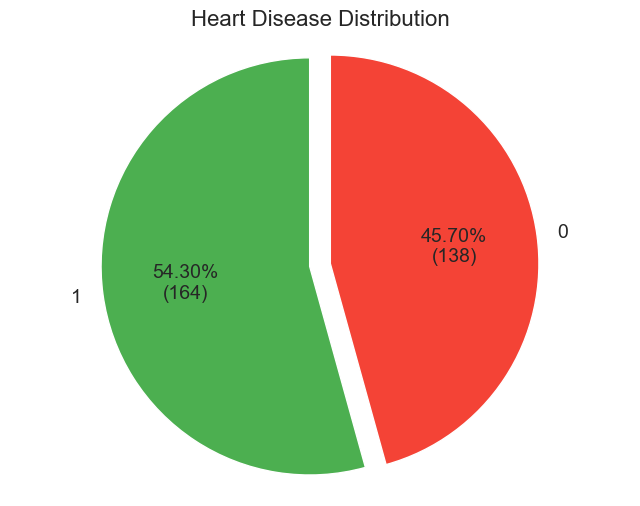

In [31]:
# Distribution of the target
sns.set_style('darkgrid')
target_counts = df['target'].value_counts()
colors = ['#4CAF50', '#F44336']  
labels = target_counts.index
explode = (0.1, 0)  

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_format

# Creating the pie chart
plt.figure(figsize=(8,6))
plt.pie(target_counts, explode=explode, labels=labels, colors=colors, autopct=autopct_format(target_counts), startangle=90, textprops={'fontsize': 14})
plt.title('Heart Disease Distribution', fontsize = 16)
plt.axis('equal')

plt.show()

54.30% of the patients have a heart disease while 45.70% do not. Our data is relatively balance

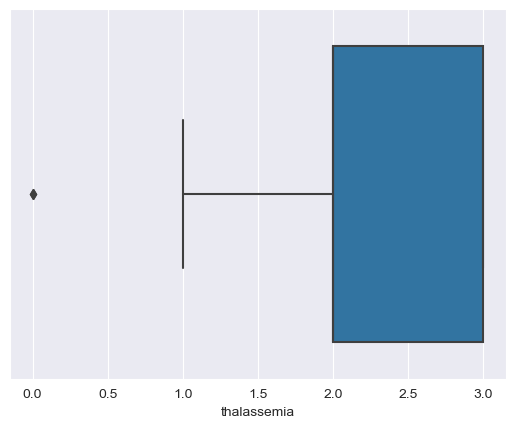

In [34]:
# Check for outliers

sns.boxplot(x=df["thalassemia"])

plt.show()

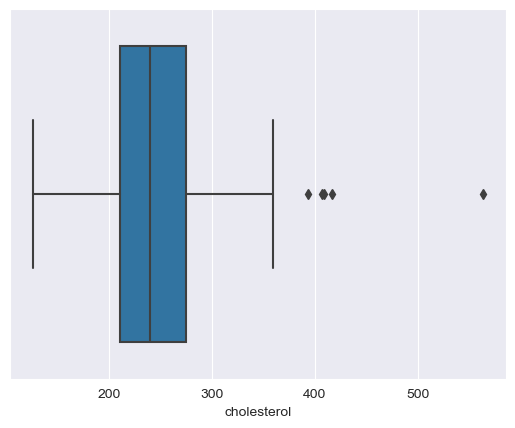

In [36]:
sns.boxplot(x=df["cholesterol"])

plt.show()

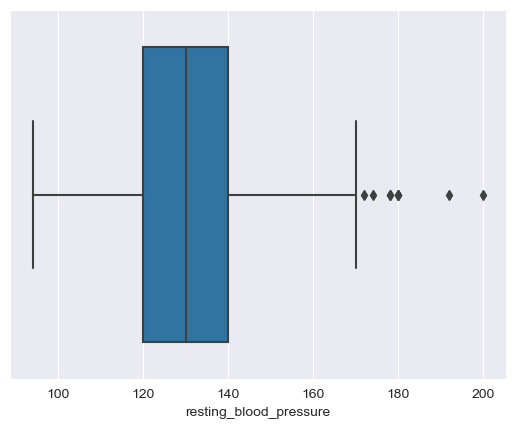

In [38]:
sns.boxplot(x=df["resting_blood_pressure"])

plt.show()

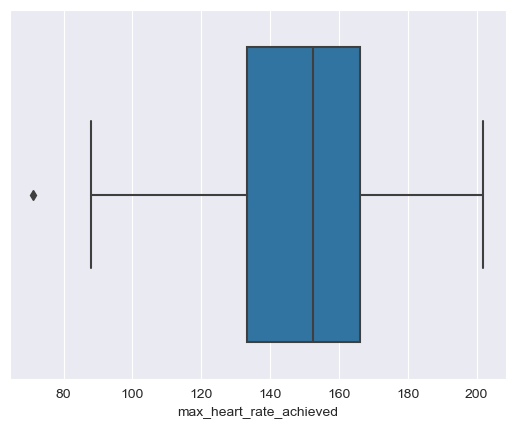

In [40]:
sns.boxplot(x=df['max_heart_rate_achieved'])

plt.show()

In [42]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

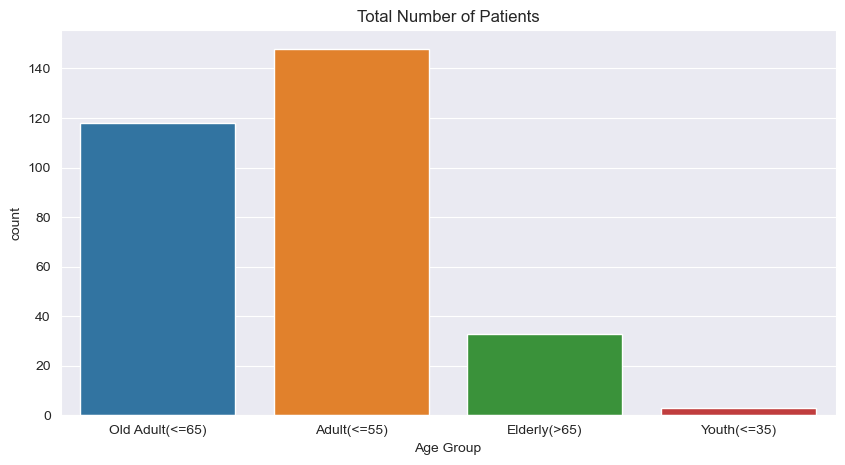

In [44]:
# Data Visualization

# Age group categorization
def age_bracket(age):
    if age <= 34:
        return "Youth(<=35)"
    elif age <= 55:
        return "Adult(<=55)"
    elif age <= 65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"
df['age_bracket'] = df['age'].apply(age_bracket)

# Investigating the age group of patients
plt.figure(figsize = (10, 5))
sns.countplot(x='age_bracket', data=df)
plt.xlabel('Age Group')
plt.title('Total Number of Patients')

plt.show()

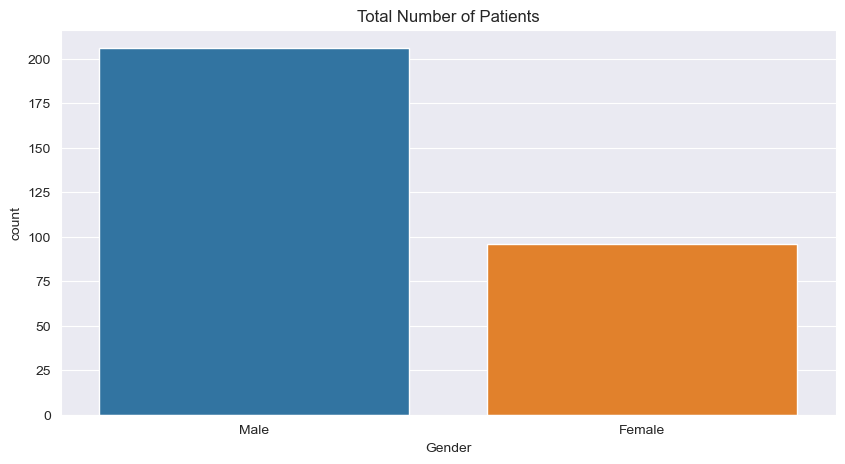

In [46]:
# Data Visualization

# Sex
def gender(sex):
    if sex == 1:
        return 'Male'
    else:
        return 'Female'
    
df['gender'] = df['sex'].apply(gender)

# Investigating the age group of patients
plt.figure(figsize = (10, 5))
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.title('Total Number of Patients')

plt.show()

In [48]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female


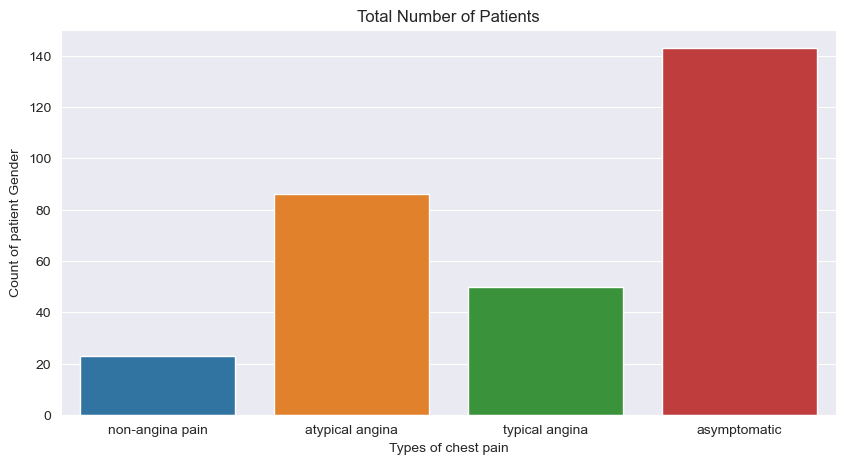

In [50]:
# Chest pain type (1: typical angina, 2: atypical angina, 3: non-angina pain, 4: asymptomatic)

def chest_pain(cp):
    if cp == 1:
        return 'typical angina'
    elif cp == 2:
        return 'atypical angina'
    elif cp == 3:
        return 'non-angina pain'
    else:
        return 'asymptomatic'
    
df['cp_cat'] = df['chest_pain_type'].apply(chest_pain)

#Investigating the gender of patients
plt.figure(figsize = (10, 5))
sns.countplot(x='cp_cat', data=df)
plt.xlabel('Types of chest pain')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients')

plt.show()

In [52]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-angina pain
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic


In [54]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target', 'age_bracket',
       'gender', 'cp_cat'],
      dtype='object')

label
Yes    164
No     138
Name: count, dtype: int64


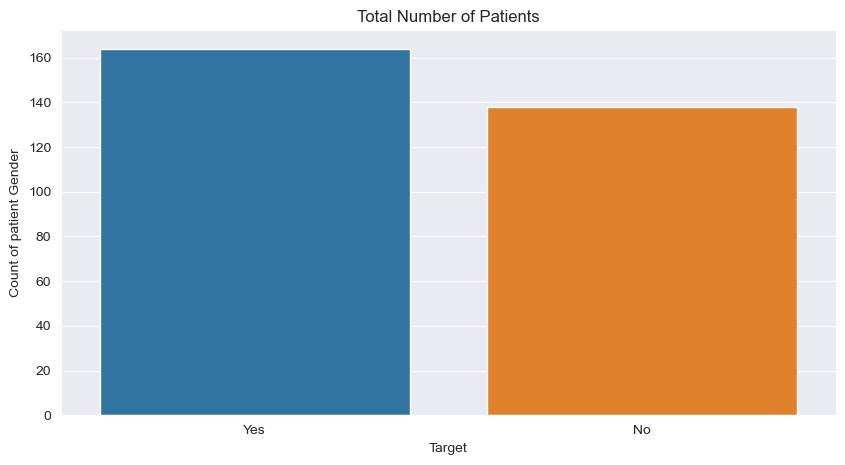

In [56]:
# Target - have a disease or not (1 - yes, 0 - no)

def label(tg):
    if tg == 1:
        return 'Yes'
    else:
        return 'No'
    
df['label'] = df['target'].apply(label)

# Total patients in each category
print(df["label"].value_counts())

#Investigating the gender of patients
plt.figure(figsize = (10, 5))
sns.countplot(x='label', data=df)
plt.xlabel('Target')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients')

plt.show()

#### Bivariate Analysis

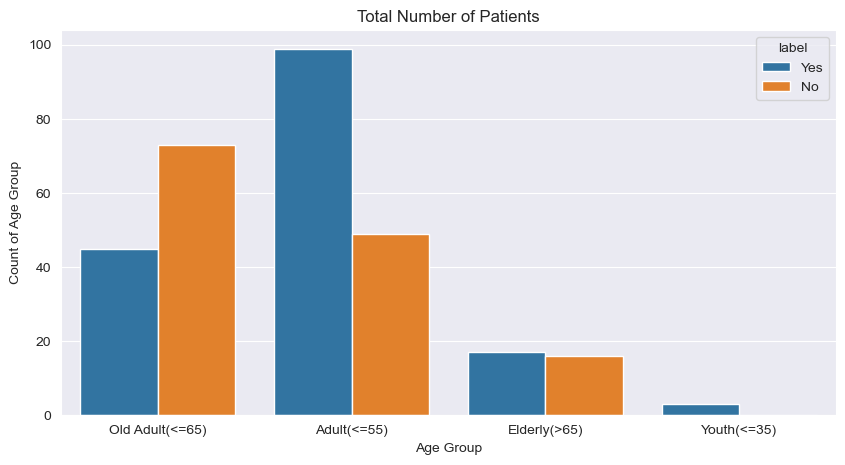

In [59]:
# Investigating the age group of patients by the target feature

plt.figure(figsize = (10, 5))
sns.countplot(x='age_bracket', data=df, hue='label')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

plt.show()

The adult and old adults has the highest number of patients with a heart disease. The least are the youths

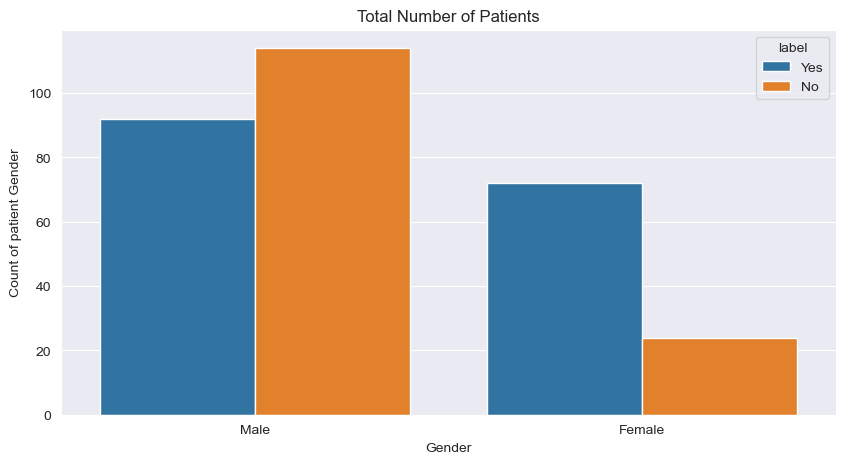

In [61]:
# Investigating the age group of patients by the target feature

plt.figure(figsize = (10, 5))
sns.countplot(x='gender', data=df, hue='label')
plt.xlabel('Gender')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients')

plt.show()

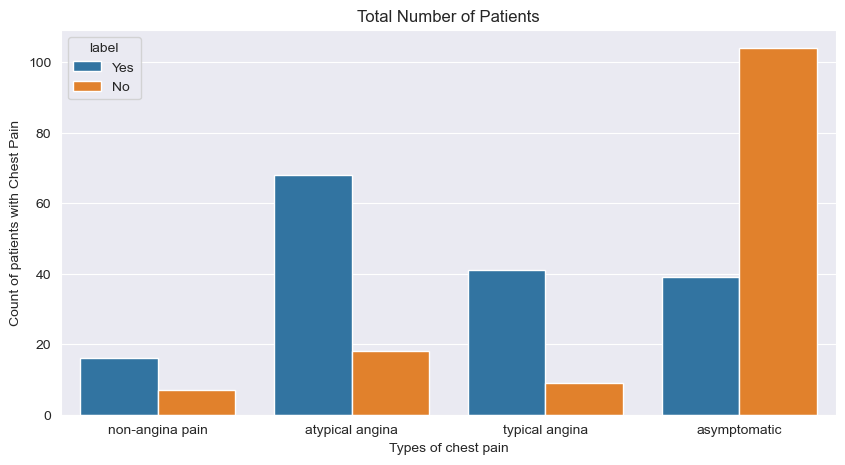

In [63]:
# Investigating the gender of patients by the target feature

plt.figure(figsize = (10, 5))
sns.countplot(x='cp_cat', data=df, hue='label')
plt.xlabel('Types of chest pain')
plt.ylabel('Count of patients with Chest Pain')
plt.title('Total Number of Patients')

plt.show()

The majority of the patients with the atypical angina chest pain have a heart disease. However, majority of the patients with asymptomatic chest pain type does not have a heart disease

####  Multivariate Analysis

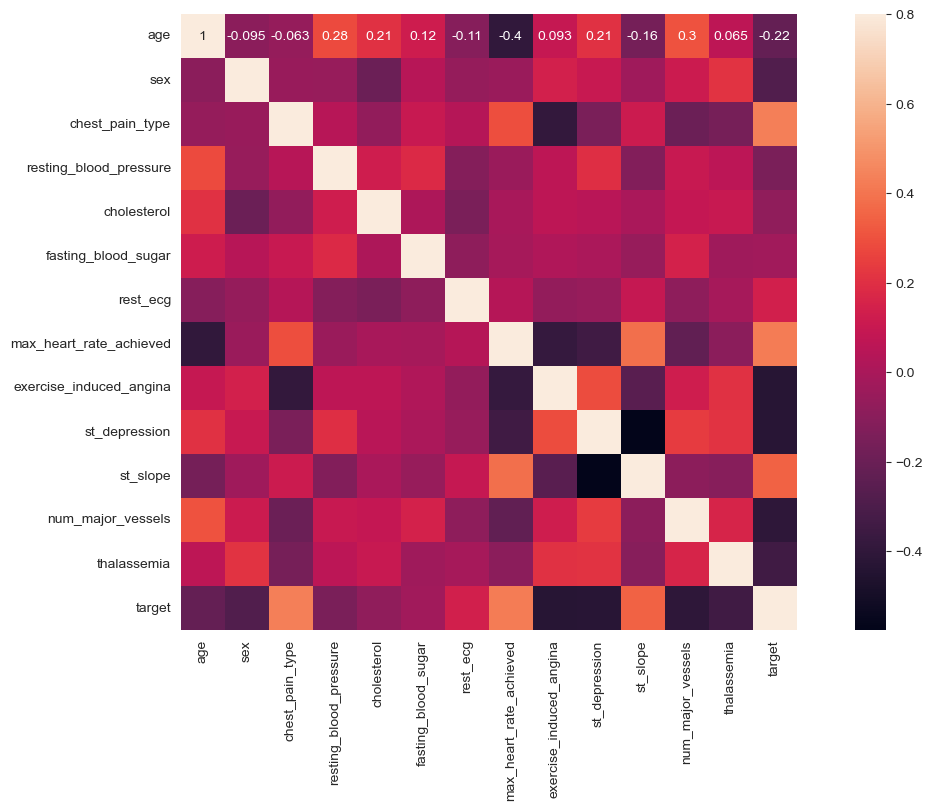

In [87]:
#  correlation between the target feature and all the features in the dataset
numeric_data = df.select_dtypes(include="number")
corr_matrix = numeric_data.corr()

f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr_matrix, vmax=.8, square=True, annot=True)

plt.show()

The correlation matrix shows which features are strongly or weakly correlated with the target